In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df = df[df['City'] == "Delhi"]
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [6]:
df=df.drop(columns=["NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","City"],axis=1)
df.head()

,Date,PM2.5,PM10,NO,NO2,AQI,AQI_Bucket
10229,2015-01-01,313.22,607.98,69.16,36.39,472.0,Severe
10230,2015-01-02,186.18,269.55,62.09,32.87,454.0,Severe
10231,2015-01-03,87.18,131.90,25.73,30.31,143.0,Moderate
10232,2015-01-04,151.84,241.84,25.01,36.91,319.0,Very Poor
10233,2015-01-05,146.60,219.13,14.01,34.92,325.0,Very Poor


In [7]:
df=df.fillna(method='ffill')
df.head()

,Date,PM2.5,PM10,NO,NO2,AQI,AQI_Bucket
10229,2015-01-01,313.22,607.98,69.16,36.39,472.0,Severe
10230,2015-01-02,186.18,269.55,62.09,32.87,454.0,Severe
10231,2015-01-03,87.18,131.90,25.73,30.31,143.0,Moderate
10232,2015-01-04,151.84,241.84,25.01,36.91,319.0,Very Poor
10233,2015-01-05,146.60,219.13,14.01,34.92,325.0,Very Poor


In [8]:
 %matplotlib inline

In [9]:
def month(x):
    return x[5:7]

df["Date"] = df["Date"].astype("str")

df["Date"] = df["Date"].apply(month)
df.head(15)

,Date,PM2.5,PM10,NO,NO2,AQI,AQI_Bucket
10229,01,313.22,607.98,69.16,36.39,472.0,Severe
10230,01,186.18,269.55,62.09,32.87,454.0,Severe
10231,01,87.18,131.90,25.73,30.31,143.0,Moderate
10232,01,151.84,241.84,25.01,36.91,319.0,Very Poor
10233,01,146.60,219.13,14.01,34.92,325.0,Very Poor
10234,01,149.58,252.10,17.21,37.84,318.0,Very Poor
10235,01,217.87,376.51,26.99,40.15,353.0,Very Poor
10236,01,229.90,360.95,23.34,43.16,383.0,Very Poor
10237,01,201.66,397.43,19.18,38.56,375.0,Very Poor
10238,01,221.02,361.74,24.79,46.39,376.0,Very Poor


(array([162., 374., 357., 375., 372., 239.,  89.,  27.,   9.,   5.]),
 array([ 29. ,  97.7, 166.4, 235.1, 303.8, 372.5, 441.2, 509.9, 578.6,
        647.3, 716. ]),
 <a list of 10 Patch objects>)

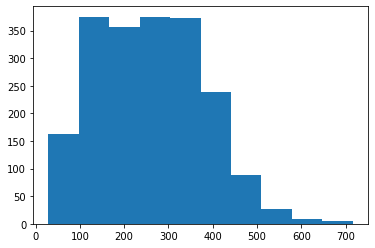

In [10]:
plt.hist(df["AQI"])

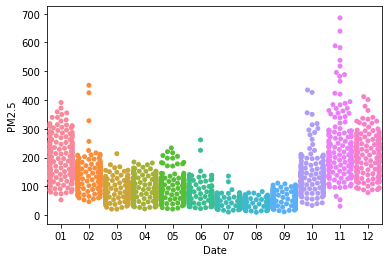

In [11]:
sns.swarmplot(x="Date", y="PM2.5", data=df)

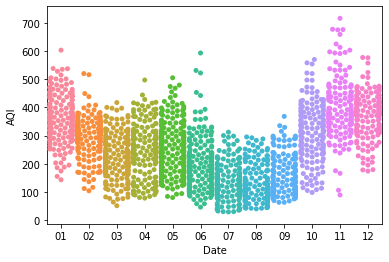

In [12]:
sns.swarmplot(x="Date", y="AQI", data=df)

In [13]:
index = [j for j in range(2009)]
df.index = index

In [14]:
df.head()

,Date,PM2.5,PM10,NO,NO2,AQI,AQI_Bucket
0,01,313.22,607.98,69.16,36.39,472.0,Severe
1,01,186.18,269.55,62.09,32.87,454.0,Severe
2,01,87.18,131.90,25.73,30.31,143.0,Moderate
3,01,151.84,241.84,25.01,36.91,319.0,Very Poor
4,01,146.60,219.13,14.01,34.92,325.0,Very Poor


In [15]:
def conv(x):
        if x== "01":
            return("January")
        elif x=="02":
            return("February")
        elif x=="03":
            return("March")
        elif x=="04":
            return("April")
        elif x=="05":
            return("May")
        elif x=="06":
            return("June")
        elif x=="07":
            return("July")
        elif x=="08":
            return("August")
        elif x=="09":
            return("September")
        elif x==10:
            return("October")
        elif x==11:
            return("November")
        elif x==12:
            return("December")

df["Date"] = df["Date"].apply(conv)

In [16]:
df.tail()

,Date,PM2.5,PM10,NO,NO2,AQI,AQI_Bucket
2004,June,39.80,155.94,10.88,21.46,112.0,Moderate
2005,June,59.52,308.65,12.67,21.60,196.0,Moderate
2006,June,44.86,184.12,10.50,21.57,233.0,Poor
2007,June,39.80,91.98,5.99,17.96,114.0,Moderate
2008,July,54.01,128.66,6.33,21.05,101.0,Moderate


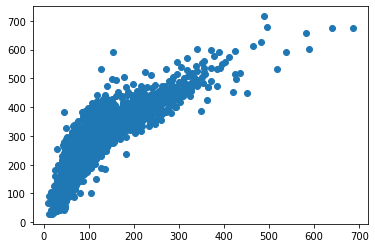

In [18]:
plt.scatter(df["PM2.5"],df["AQI"])

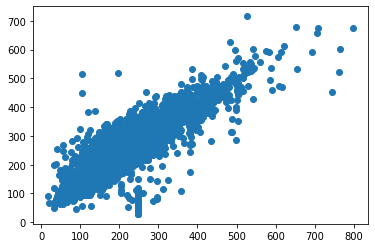

In [19]:
plt.scatter(df["PM10"],df["AQI"])

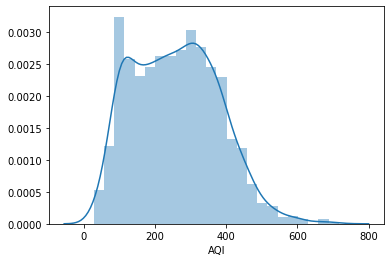

In [20]:
data = df['AQI']
sns.distplot(data, kde = True)